Copyright 2021 Amazon.com and its affiliates; all rights reserved. This file is AWS Content and may not be duplicated or distributed without permission

# Demonstrate the use of feature sets with Amazon SageMaker Feature Store
This notebook provides a demo of how to pull together a feature vector from across multiple feature groups at runtime for online inference. It does this by leveraging a simple  set of utility functions that wrap the feature store API to keep it simple for a data scientist using Python.

#### Endpoint-based feature lookup using SageMaker Feature Store
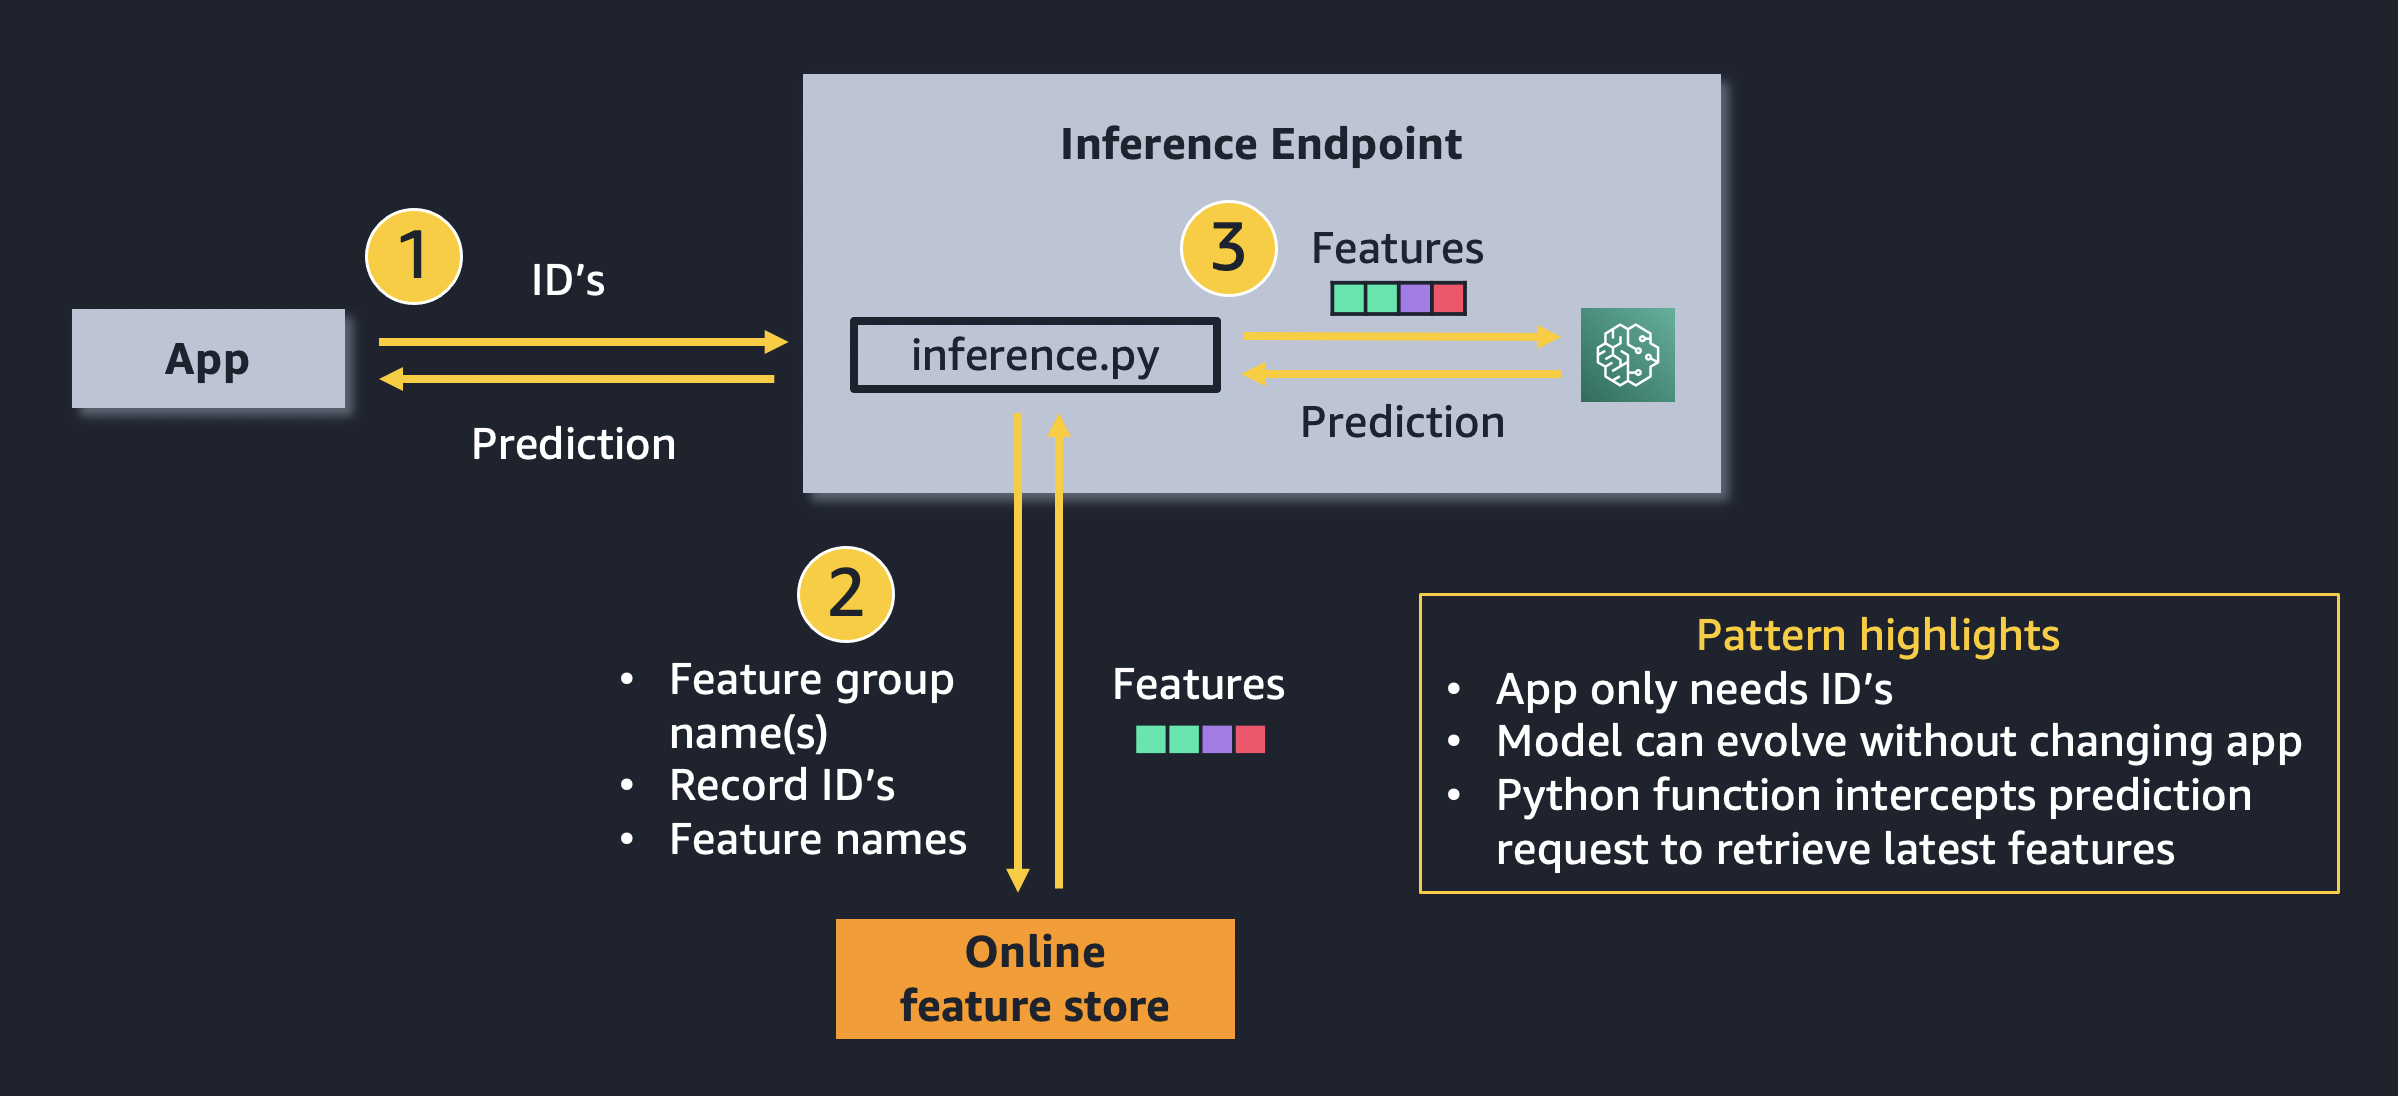

### A few imports

In [ ]:
from utilities.feature_store_helper import FeatureStore

from IPython.core.display import display, HTML, Markdown
import pandas as pd
import time
import json
from sklearn.ensemble import RandomForestClassifier

FG_NAME = 'fs-demo-2022-03-24'

fs = FeatureStore()

## Demonstrate inference-time retrieval of feature set

In [ ]:
fs_dict = fs.get_latest_featureset_values({'HOUSE_ID': 95, 'Id': 2},
                                             [f'{FG_NAME}:ZipCode',
                                              'housing:SQUARE_FEET', 
                                              'payments:*'])

print(f'Feature set as dictionary: {fs_dict}')

print(f'Feature set as vector: {list(fs_dict.values())}')

In [ ]:
fs_dict = fs.get_latest_featureset_values({'HOUSE_ID': 34, 'Id': 3}, 
                                             [f'{FG_NAME}:ZipCode',
                                              'housing:NUM_BEDROOMS', 
                                              'housing:NUM_BATHROOMS',
                                              'payments:avg_amount'])

print(f'Feature set as dictionary: {fs_dict}')

print(f'Feature set as vector: {list(fs_dict.values())}')

#### Save feature set definitions as metadata

In [ ]:
churn_feature_set = ['claims:num_claims_last_1y',
                     f'{FG_NAME}:ZipCode',
                     'payments:*']

#### Use feature set definition to drive lookup of feature vector at inference time

In [ ]:
fs_dict = fs.get_latest_featureset_values({'Id': 5}, churn_feature_set)

print(f'Feature set as dictionary: {fs_dict}')

print(f'Feature set as vector: {list(fs_dict.values())}')

#### Could even use that same feature set definition to automatically generate and deploy a complete SageMaker endpoint  given a trained model

## Clean up
Delete the feature group and its offline storage.

In [ ]:
# Utils.delete_feature_group(FG_NAME)